# Dünnschnabelmöwen und Dickhornschafe

Die Unterscheidung zwischen Dünnschnabelmöwen und Dickhornschafen stellt eine interessante und relevante Aufgabenstellung in der biologischen Forschung und Naturschutz dar. Diese beiden Arten sind nicht nur ökologisch bedeutend, sondern auch faszinierend in ihrem Verhalten und ihren Lebensräumen. Die Fähigkeit, diese beiden Arten zu unterscheiden, ist deshalb essentiell für den weiteren beruflichen Werdegang:

Aufgabenstellungen:
- Lade die Datei animals.csv.
- Gib die ersten 5 Zeilen des Datensets auf der Kommandozeile aus:
- Schreibe ein Programm p1_classification in Python, welches die Daten wie folgt visualisiert. Nutze die Bibliotheken pandas, matplotlib:
- Randomisiere das Datenset. Kodiere die Labels als numerische Werte, damit sie von Tensorflow verarbeitet werden können. Teile die Daten in p2_classification in Trainings- und Testdaten (80% Training, 20% Test). Erstelle in Keras ein Modell mit 2 Hidden Layers mit jeweils 4 Knoten und Relu-Aktivierung. Der Output-Knoten soll die Sigmoid-Funktion als Aktivierung haben. Nimm Binary Cross Entropy als Loss-Funktion, und den Adam-Optimizer. Trainiere das Modell 50 (eventuell mehr) Epochen lang, mit einer Batch-Größe von 100.
- Plotte die Loss-Funktion über Training und Test. Wie unterscheidet sich der Verlauf für wenige und viele Epochen?
- Plotte das gelernte Modell und die Test-Daten: Nutze contourf und scatter der matplotlib:
- Berechne zuletzt die Vorhersagewerte des Modells für folgende Wertepaare:  Umfang/Groesse:  [90, 90], [70, 70].

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras import layers, models



In [170]:
df = pd.read_csv('data/animals.csv')

Gib die ersten 5 Zeilen des Datensets auf der Kommandozeile aus:

In [171]:
df.head()

,Groesse,Umfang,Label
0,94.981605,118.028572,Duennschnabelmoewe
1,109.279758,103.946339,Duennschnabelmoewe
2,86.240746,86.239781,Duennschnabelmoewe
3,104.044600,108.322903,Duennschnabelmoewe
4,113.297706,88.493564,Duennschnabelmoewe


Schreibe ein Programm p1_classification in Python, welches die Daten wie folgt visualisiert. Nutze die Bibliotheken pandas, matplotlib:

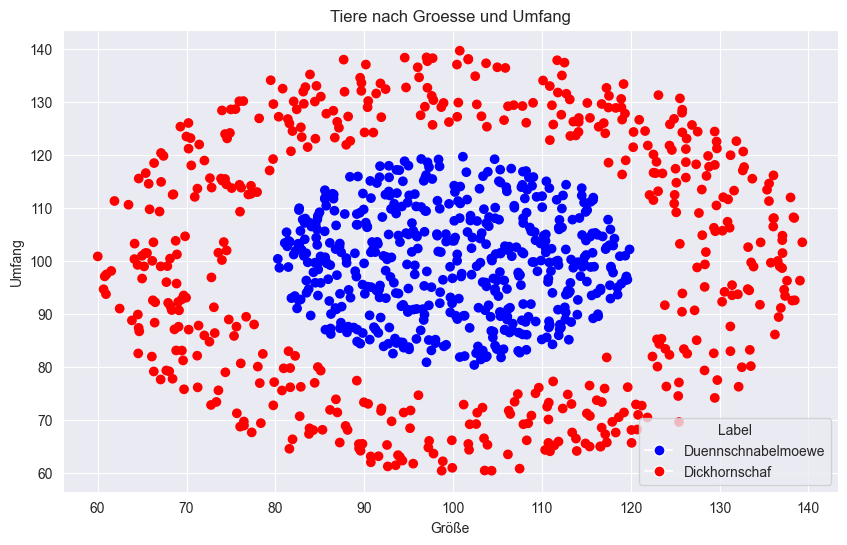

In [172]:
from matplotlib.lines import Line2D

# Define color mapping
farben = df['Label'].map({'Duennschnabelmoewe': 'blue', 'Dickhornschaf': 'red'})

# Create figure
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Groesse'], df['Umfang'], c=farben)

# Labels and title
plt.xlabel('Größe')
plt.ylabel('Umfang')
plt.title('Tiere nach Groesse und Umfang')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Duennschnabelmoewe', markersize=8, markerfacecolor='blue'),
    Line2D([0], [0], marker='o', color='w', label='Dickhornschaf', markersize=8, markerfacecolor='red')
]
plt.legend(handles=legend_elements, title="Label")
plt.show()

In [173]:
# Randomisiere das Datenset. Kodiere die Labels als numerische Werte, damit sie von Tensorflow verarbeitet werden können. Teile die Daten in p2_classification in Trainings- und Testdaten (80% Training, 20% Test). Erstelle in Keras ein Modell mit 2 Hidden Layers mit jeweils 4 Knoten und Relu-Aktivierung. Der Output-Knoten soll die Sigmoid-Funktion als Aktivierung haben. Nimm Binary Cross Entropy als Loss-Funktion, und den Adam-Optimizer. Trainiere das Modell 50 (eventuell mehr) Epochen lang, mit einer Batch-Größe von 100.
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['Label'] = df['Label'].astype(str).map({'Duennschnabelmoewe': 0, 'Dickhornschaf': 1})

# Eingangs- und Ausgangsvariablen definieren
X = df[['Groesse', 'Umfang']].values
y = df['Label'].values

# Daten in Trainings- (80%) und Testdaten (20%) aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell mit 2 Hidden Layers
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Explicit Input layer
    layers.Dense(4, activation='relu'),  # Input Layer + Hidden Layer 1
    layers.Dense(4, activation='relu'),  # Hidden Layer 2
    layers.Dense(1),  # Output Layer
    layers.Dense(1, activation='sigmoid')
])

# Modell kompilieren
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

# Modell trainieren
model_hist50 = model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=1, validation_data=(X_test, y_test))
model_hist100 = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5215 - loss: 3.4084 - val_accuracy: 0.5550 - val_loss: 2.7637
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5381 - loss: 2.7434 - val_accuracy: 0.5550 - val_loss: 2.3598
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5343 - loss: 2.4451 - val_accuracy: 0.5350 - val_loss: 2.0492
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5595 - loss: 2.0514 - val_accuracy: 0.5500 - val_loss: 1.8329
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5423 - loss: 1.8070 - val_accuracy: 0.5600 - val_loss: 1.6878
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5824 - loss: 1.6093 - val_accuracy: 0.5550 - val_loss: 1.5836
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5463 - loss: 1.5923 - val_accuracy: 0.5650 - val_loss: 1.4935
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5668 - loss: 1.4614 - val_accuracy: 0.5650 - val_loss: 1.4101
Epoch 9

In [174]:
#Plotte die Loss-Funktionen für Training und Test:

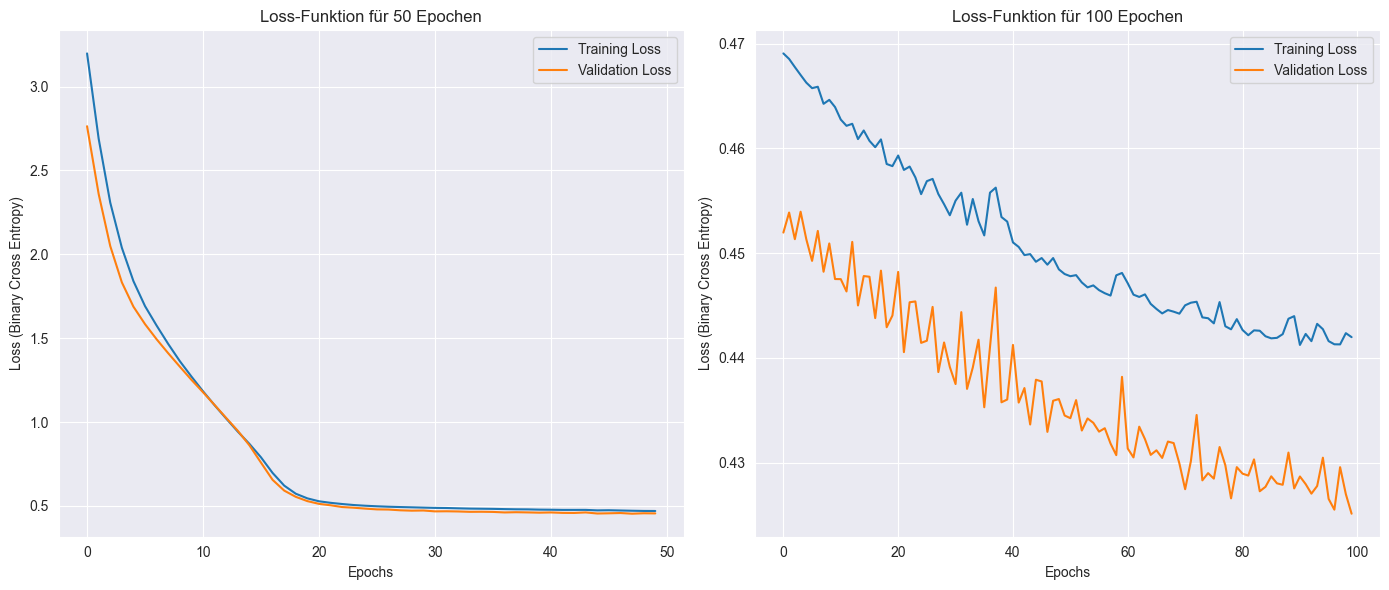

In [175]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for model_hist50
axes[0].plot(model_hist50.history['loss'], label='Training Loss')
axes[0].plot(model_hist50.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss (Binary Cross Entropy)')
axes[0].legend()
axes[0].set_title('Loss-Funktion für 50 Epochen')

# Plot for model_hist100
axes[1].plot(model_hist100.history['loss'], label='Training Loss')
axes[1].plot(model_hist100.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (Binary Cross Entropy)')
axes[1].legend()
axes[1].set_title('Loss-Funktion für 100 Epochen')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step


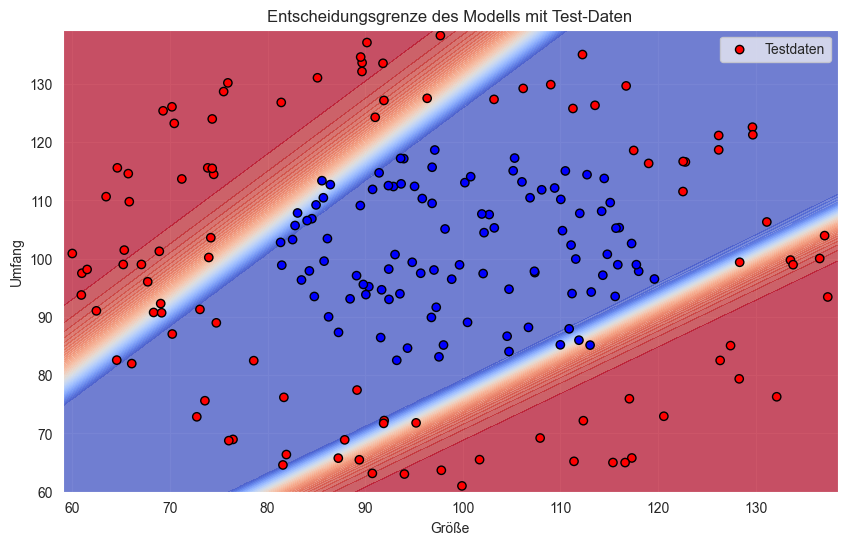

In [176]:
# Plotte das gelernte Modell und die Test-Daten: Nutze contourf und scatter der matplotlib:
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Vorhersage für jeden Punkt im Gitter
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Erstelle die Kontur-Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=50, cmap="coolwarm", alpha=0.7)

# Plotte die Test-Daten als Scatter-Plot
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="bwr", edgecolors='k', label="Testdaten")

# Achsenbeschriftung und Titel
plt.xlabel("Größe")
plt.ylabel("Umfang")
plt.title("Entscheidungsgrenze des Modells mit Test-Daten")
plt.legend()
plt.show()